# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns

sns.set()
sns.set_context("notebook")
sns.set_style("whitegrid")

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

        
        
# https://api.openweathermap.org/data/3.0/onecall?lat={lat}&lon={lon}&exclude={part}&appid={API key}

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 3 of Set 1 | vieste
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | georgiyevskoye
Processing Record 6 of Set 1 | kruisfontein
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | oranjemund
Processing Record 12 of Set 1 | ekhabi
Processing Record 13 of Set 1 | talara
Processing Record 14 of Set 1 | utiroa
City not found. Skipping...
Processing Record 15 of Set 1 | pochuta
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | prince albert
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | majene
Processi

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [8]:
# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,arraial do cabo,-22.9661,-42.0278,25.98,94,100,3.60,BR,1673360744
1,vieste,41.8825,16.1750,12.27,63,82,16.50,IT,1673360744
2,georgiyevskoye,58.7310,45.0240,-25.19,92,8,3.09,RU,1673360744
3,kruisfontein,-34.0033,24.7314,26.60,53,17,6.07,ZA,1673360745
4,port elizabeth,-33.9180,25.5701,27.83,73,0,6.69,ZA,1673360745
5,ushuaia,-54.8000,-68.3000,11.81,66,75,7.72,AR,1673360745
6,thompson,55.7435,-97.8558,-12.91,92,100,2.57,CA,1673360745
7,hithadhoo,-0.6000,73.0833,27.24,78,100,5.68,MV,1673360745
8,oranjemund,-28.5500,16.4333,20.84,66,10,6.83,NA,1673360745
9,ekhabi,53.5102,142.9671,-29.05,100,96,1.87,RU,1673360745


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,25.98,94,100,3.60,BR,1673360744
1,vieste,41.8825,16.1750,12.27,63,82,16.50,IT,1673360744
2,georgiyevskoye,58.7310,45.0240,-25.19,92,8,3.09,RU,1673360744
3,kruisfontein,-34.0033,24.7314,26.60,53,17,6.07,ZA,1673360745
4,port elizabeth,-33.9180,25.5701,27.83,73,0,6.69,ZA,1673360745


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

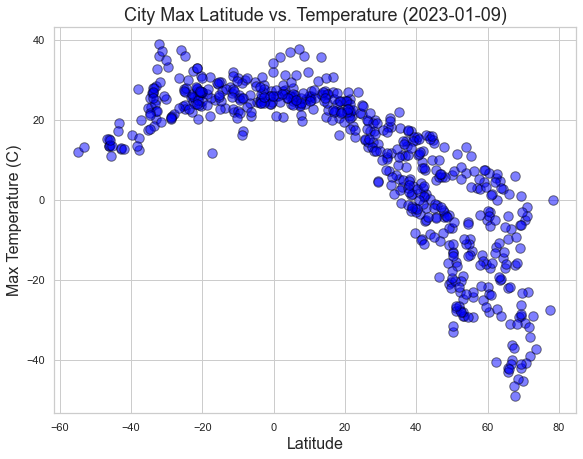

In [11]:
# Build scatter plot for latitude vs. temperature
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Max Temp"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Max Temperature (C)", fontsize=16)
plt.title("City Max Latitude vs. Temperature (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig1.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude Vs. Humidity

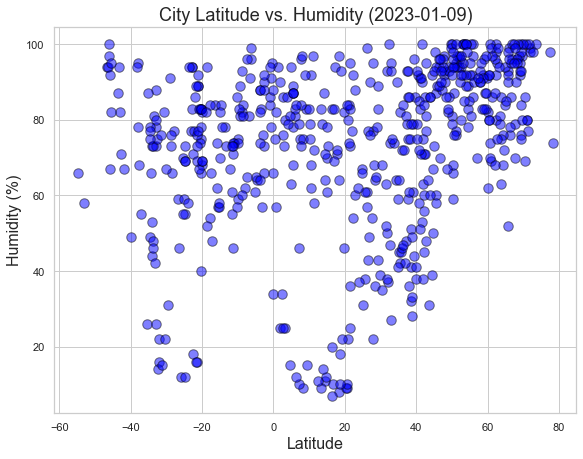

In [12]:
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Humidity"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Humidity (%)", fontsize=16)
plt.title("City Latitude vs. Humidity (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig2.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

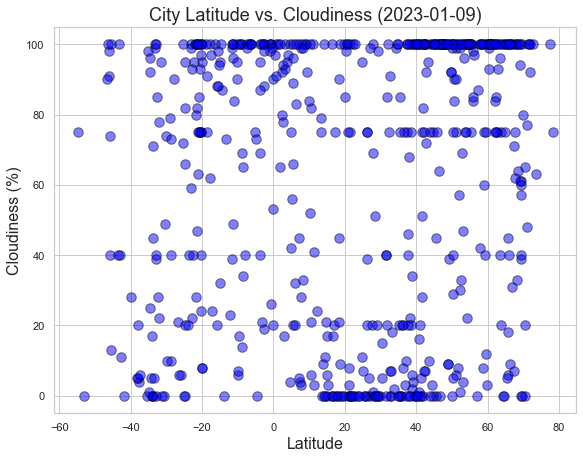

In [13]:
# Build the scatter plots for latitude vs. cloudiness
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Cloudiness"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Cloudiness (%)", fontsize=16)
plt.title("City Latitude vs. Cloudiness (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig3.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

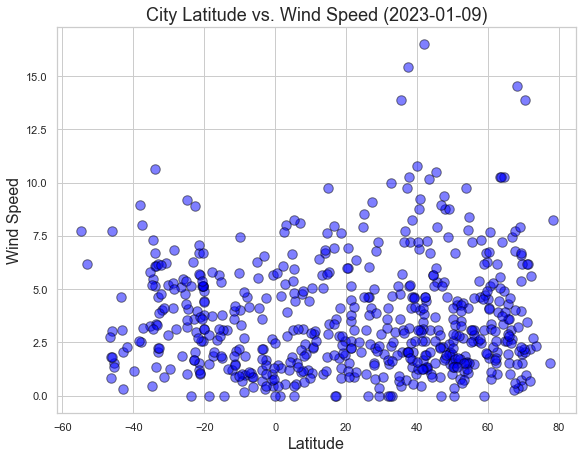

In [14]:
# Build the scatter plots for latitude vs. wind speed
# Plot main data
xPlot = city_data_df["Lat"]
yPlot = city_data_df["Wind Speed"]
plt.scatter(xPlot, yPlot, 90, marker="o", facecolors="blue", edgecolors='black', alpha=0.5)
plt.tight_layout()
plt.grid(True)

# Plot output and styling
# Incorporate the other graph properties
plt.xlabel("Latitude", fontsize=16)
plt.ylabel("Wind Speed", fontsize=16)
plt.title("City Latitude vs. Wind Speed (2023-01-09)", fontsize=18)

# Save the figure
plt.savefig("output_data/Fig4.png",dpi=300, bbox_inches = "tight")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linearRegression(x_values,y_values, regEQplotX, regEQplotY, ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, 90, marker="o", facecolors="blue", alpha=0.5)
    plt.plot(x_values,regress_values,"r-", linewidth=3)
    plt.grid(True)
    print(f'The r-value is {rvalue}')
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=18,color="red")
    plt.xlabel('Latitude', fontsize=16)
    plt.ylabel(f'{ylabel}', fontsize=16)
    plt.grid() 

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)>= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vieste,41.8825,16.1750,12.27,63,82,16.50,IT,1673360744
2,georgiyevskoye,58.7310,45.0240,-25.19,92,8,3.09,RU,1673360744
6,thompson,55.7435,-97.8558,-12.91,92,100,2.57,CA,1673360745
9,ekhabi,53.5102,142.9671,-29.05,100,96,1.87,RU,1673360745
11,pochuta,14.5500,-91.0833,20.63,64,0,1.81,GT,1673360746


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float)< 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,arraial do cabo,-22.9661,-42.0278,25.98,94,100,3.60,BR,1673360744
3,kruisfontein,-34.0033,24.7314,26.60,53,17,6.07,ZA,1673360745
4,port elizabeth,-33.9180,25.5701,27.83,73,0,6.69,ZA,1673360745
5,ushuaia,-54.8000,-68.3000,11.81,66,75,7.72,AR,1673360745
7,hithadhoo,-0.6000,73.0833,27.24,78,100,5.68,MV,1673360745


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8432782188513923


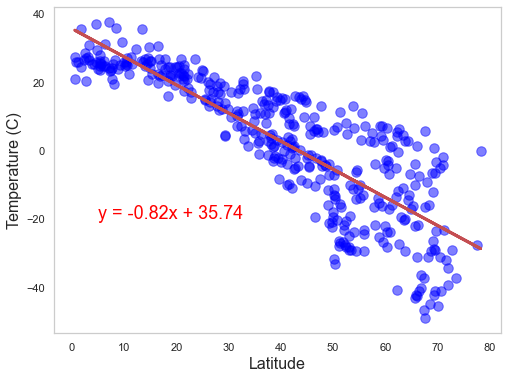

In [18]:
# Linear regression on Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, 5, -20, "Temperature (C)")
plt.savefig("output_data/Fig5.png",dpi=300, bbox_inches = "tight")

The r-value is 0.4506632339413148


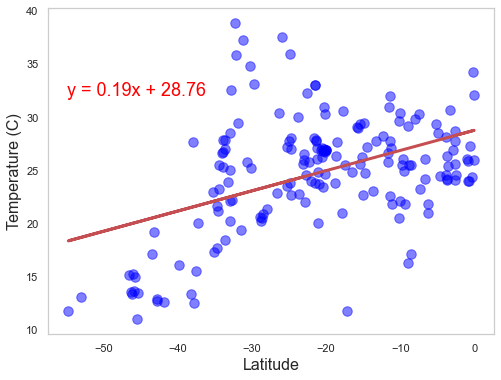

In [19]:
# Linear regression on Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Max Temp"]
linearRegression(x_plot, y_plot, -55, 32, "Temperature (C)")
plt.savefig("output_data/Fig6.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:**

The correlation between Temperature and Latitude is stronger in the Northern Hemisphere(R-squared 86%) as opposed to the Southern Hemisphere (R-squared 23%)

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.4499395875004912


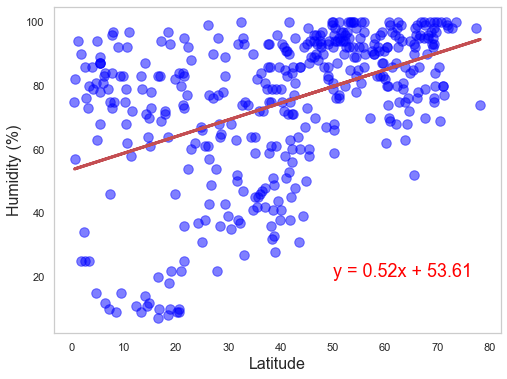

In [20]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, 50, 20, "Humidity (%)")
plt.savefig("output_data/Fig7.png",dpi=300, bbox_inches = "tight")

The r-value is 0.13240300798194377


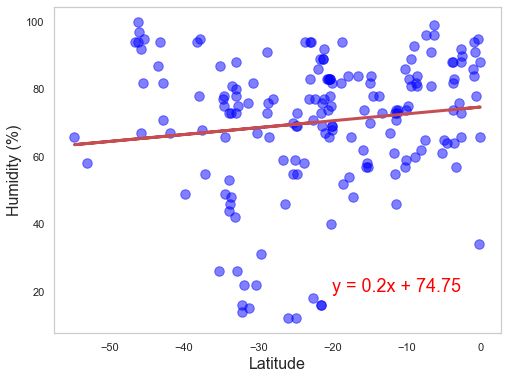

In [21]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Humidity"]
linearRegression(x_plot, y_plot, -20, 20, "Humidity (%)")
plt.savefig("output_data/Fig8.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** 

The correlation between Humidity and Latitude is consistent in both the Northern Hemisphere(R-squared 43%) and the Southern Hemisphere (R-squared 37%)

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.21349879011802964


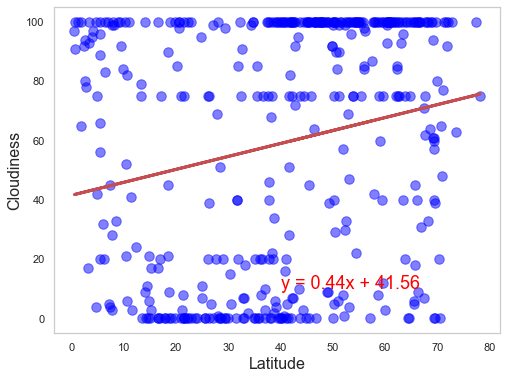

In [22]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, 40, 10, "Cloudiness")
plt.savefig("output_data/Fig9.png",dpi=300, bbox_inches = "tight")

The r-value is 0.30100215224523114


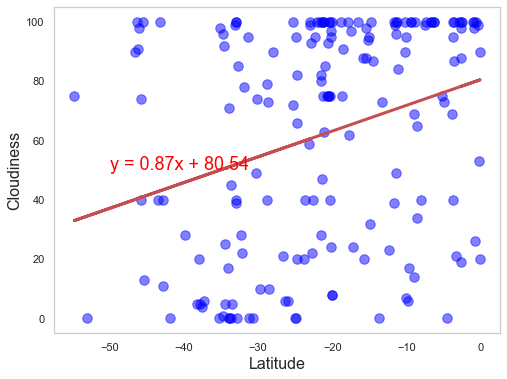

In [23]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Cloudiness"]
linearRegression(x_plot, y_plot, -50, 50, "Cloudiness")
plt.savefig("output_data/Fig10.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:**

The relationship between Cloudiness and Latitude is Stochastic.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.060669506234229356


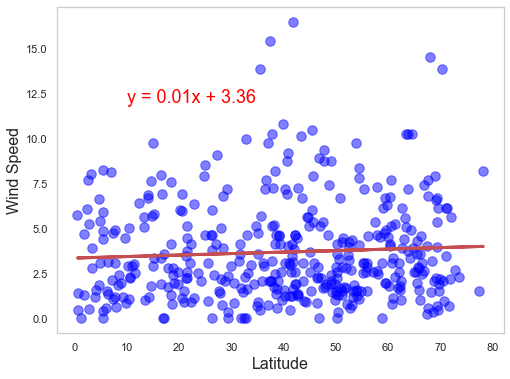

In [24]:
# Northern Hemisphere
x_plot = northern_hemi_df["Lat"]
y_plot = northern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, 10, 12, "Wind Speed")
plt.savefig("output_data/Fig11.png",dpi=300, bbox_inches = "tight")

The r-value is -0.2954018624715372


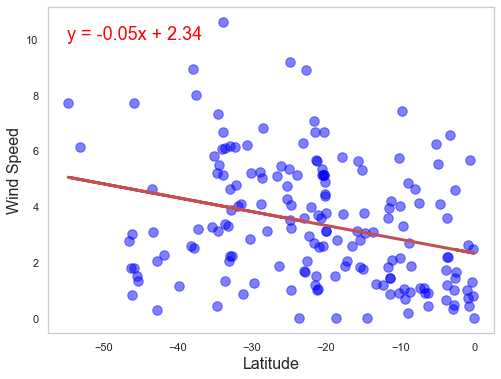

In [26]:
# Southern Hemisphere
x_plot = southern_hemi_df["Lat"]
y_plot = southern_hemi_df["Wind Speed"]
linearRegression(x_plot, y_plot, -55, 10, "Wind Speed")
plt.savefig("output_data/Fig12.png",dpi=300, bbox_inches = "tight")

**Discussion about the linear relationship:** 

The correlation between Wind Speed and Latitude is stronger in the Northern Hemisphere as opposed to the Southern Hemisphere, with both plots indicating that wind speed lowers as we approach the equator.